In [1]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Напишите функцию fill_na, которая принимает на вход данные с тремя переменными:

x_1  -  числовой вектор

x_2 - числовой вектор

y - числовой вектор с пропущенными значениями.

Теперь — ﻿самое интересное. На первом этапе, используя только наблюдения, в которых нет пропущенных значений, мы построим регрессионную модель (без взаимодействий), где  y — зависимая переменная, x_1 и x_2 — независимые переменные. Затем, используя построенную модель, мы заполним пропущенные значения предсказаниями модели.

Функция должна возвращать dataframe c новой переменной  y_full. Сохраните в нее переменную y, в которой пропущенные значения заполнены предсказанными значениями построенной модели.

```
> test_data <- read.csv("https://stepic.org/media/attachments/course/129/fill_na_test.csv")
> fill_na﻿(test_data)
   x_1 x_2  y   y_full
1    9  22 14 14.00000
2   14  35  9  9.00000
3   10  45 NA 13.12727
4    6  35 NA 13.30132
5   11  36 16 16.00000
6    5  27 11 11.00000
7    9  34 NA 12.83632
8    6  25 NA 12.90783
9   11  38 13 13.00000
10  12  23 NA 11.97784
```

In [0]:
%%R 
fill_na <- function(x) {
    l_m <- lm(y ~ x_1 + x_2, x)
    y_full <- x$y
    # predict(r, x)
    NAs <- which(is.na(y_full))
    y_full[NAs] <- predict(l_m, x)[NAs]
    x$y_full <- y_full
    x
}

В переменной df сохранен subset данных mtcars только с переменными "wt", "mpg", "disp", "drat", "hp". Воспользуйтесь множественным регрессионным анализом, чтобы предсказать вес машины (переменная "wt"). Выберите такую комбинацию независимых переменных (из "mpg", "disp", "drat", "hp"), чтобы значение R^2 adjusted было наибольшим. Взаимодействия факторов учитывать не надо. 

Выполните все операции по сравнению моделей на вашем компьютере.
В поле для ответа сохраните в переменную  model регрессионную модель с оптимальной комбинацией предикторов!

In [7]:
%%R 
df <- subset(mtcars, select = c("wt", "mpg", "disp", "drat", "hp"))
str(df)

'data.frame':	32 obs. of  5 variables:
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ disp: num  160 160 108 258 360 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...


In [0]:
%%R 
library(ggplot2)

In [25]:
%%R 
summary(lm(wt ~ mpg+disp+hp, df))


Call:
lm(formula = wt ~ mpg + hp, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6097 -0.3261 -0.1417  0.3081  1.3873 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.2182863  0.7455994   8.340 3.42e-09 ***
mpg         -0.1455218  0.0237443  -6.129 1.12e-06 ***
hp          -0.0005277  0.0020872  -0.253    0.802    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5024 on 29 degrees of freedom
Multiple R-squared:  0.7534,	Adjusted R-squared:  0.7364 
F-statistic: 44.29 on 2 and 29 DF,  p-value: 1.529e-09



Воспользуйтесь встроенным датасетом attitude, чтобы предсказать рейтинг (rating) по переменным complaints и critical. Каково t-значение для взаимодействия двух факторов?


In [26]:
%%R 
str(attitude)

'data.frame':	30 obs. of  7 variables:
 $ rating    : num  43 63 71 61 81 43 58 71 72 67 ...
 $ complaints: num  51 64 70 63 78 55 67 75 82 61 ...
 $ privileges: num  30 51 68 45 56 49 42 50 72 45 ...
 $ learning  : num  39 54 69 47 66 44 56 55 67 47 ...
 $ raises    : num  61 63 76 54 71 54 66 70 71 62 ...
 $ critical  : num  92 73 86 84 83 49 68 66 83 80 ...
 $ advance   : num  45 47 48 35 47 34 35 41 31 41 ...


In [32]:
%%R 
summary(lm(rating ~ complaints * critical, attitude))


Call:
lm(formula = rating ~ complaints * critical, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1988  -6.2054   0.3718   6.1426   9.6796 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)         26.923536  41.643872   0.647    0.524
complaints           0.551382   0.649862   0.848    0.404
critical            -0.181353   0.595686  -0.304    0.763
complaints:critical  0.002907   0.009192   0.316    0.754

Residual standard error: 7.243 on 26 degrees of freedom
Multiple R-squared:  0.6825,	Adjusted R-squared:  0.6459 
F-statistic: 18.63 on 3 and 26 DF,  p-value: 1.169e-06



В этом примере будем работать с хорошо вам известным встроенным датасетом mtcars. Переменная am говорит о том, какая коробка передач используется в машине: 0 - автоматическая, 1 - ручная.

Сделаем эту переменную факторной.
mtcars$am <- factor(mtcars$am, labels = c('Automatic', 'Manual'))

Теперь постройте линейную модель, в которой в качестве зависимой переменной выступает расход топлива (mpg), а в качестве независимых - вес машины (wt) и коробка передач (модифицированная am), а также их взаимодействие. Выведите summary этой модели.

Что отражает значение intercept в данной модели?

- [ ] Средний расход топлива у машин с автоматической коробкой передач
- [ ] Расход топлива у машин с нулевым весом
- [x] Расход топлива у машин с автоматической коробкой передач и нулевым весом
- [ ] Средний расход топлива у машин с нулевым весом и ручной коробкой передач
- [ ] Расход топлива у машин со средним весом

In [33]:
%%R 
mtcars$am <- factor(mtcars$am, labels = c('Automatic', 'Manual'))
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : Factor w/ 2 levels "Automatic","Manual": 2 2 2 1 1 1 1 1 1 1 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [36]:
%%R 
summary(lm(mpg ~ wt * am, mtcars))


Call:
lm(formula = mpg ~ wt * am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6004 -1.5446 -0.5325  0.9012  6.0909 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.4161     3.0201  10.402 4.00e-11 ***
wt           -3.7859     0.7856  -4.819 4.55e-05 ***
amManual     14.8784     4.2640   3.489  0.00162 ** 
wt:amManual  -5.2984     1.4447  -3.667  0.00102 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.591 on 28 degrees of freedom
Multiple R-squared:  0.833,	Adjusted R-squared:  0.8151 
F-statistic: 46.57 on 3 and 28 DF,  p-value: 5.209e-11



В этой задаче снова нужно использовать модель из предыдущей задачи и её summary.

Какие утверждения мы можем сделать на основе данной модели?

Обратите внимание на то, что чем выше значение mpg (miles per gallon), тем ниже будет расход топлива (на одном галлоне бензина машина сможет проехать большее).

- [ ] В машинах с автоматической коробкой передач вес не влияет на расход топлива, а с ручной - влияет
- [ ] В машинах с ручной коробкой передач с увеличением веса растёт расход топлива, а с автоматической - наоборот
- [ ] У машин с ручной коробкой передач расход топлива выше
- [x] У машин с ручной коробкой передач расход топлива ниже
- [ ] Вес автомобиля не влияет на расход топлива
- [x] В машинах с ручной коробкой передач вес сильнее влияет на расход топлива

Визуализируйте взаимодействие переменных wt и am, дополнив код, приведённый в задании:
Ось x - переменная wt
Ось y - переменная mpg
Цвет регрессионных прямых - переменная am

У вас должно получиться следующее изображение:

![](https://ucarecdn.com/a6a5dc1e-8248-4b5a-82a8-57c85ec16ef5/)

R[write to console]: `geom_smooth()` using formula 'y ~ x'



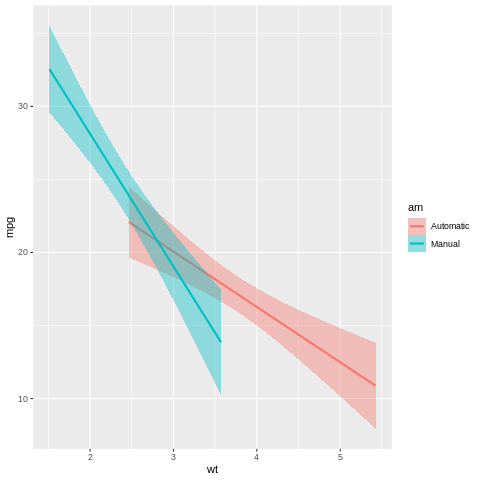

In [45]:
%%R 
# сначала переведем переменную am в фактор
mtcars$am <- factor(mtcars$am)
ggplot(mtcars, aes(wt, mpg, fill=am, col=am)) +
    # geom_point() +
    geom_smooth(method= "lm")